# Assignment on Recommendation system

**Problem statement:<br>
Build a recommender system by using cosine simillarties score.**

In [6]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
pd.set_option("display.max_rows",50)

In [8]:
import chardet

#To detect the encoding of a CSV file
with open('book.csv','rb') as f:
  result = chardet.detect(f.read())

print(result['encoding'])

ISO-8859-1


In [10]:
# Read a CSV file using Pandas with the specified encoding

books_df=pd.read_csv("book.csv" ,encoding='ISO-8859-1')

In [11]:
books_df.head(5)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [12]:
books_df.tail(5)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [13]:
books_df.shape

(10000, 4)

In [14]:
#checking for null values

books_df.isna().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [16]:
#number of unique data in each column

books_df.nunique()

Unnamed: 0     10000
User.ID         2182
Book.Title      9659
Book.Rating       10
dtype: int64

Comment:
> Here we can see that no. of unique user IDs are 2182 and total rows are 10000,<br>
This implies that User.ID column contains duplicate entries.
<br>
there is a possibility that an individual user is reading more than one book

In [17]:
books_df['User.ID'].count()

10000

In [18]:
books_df['User.ID'].nunique()

2182

In [19]:
unique_userid=books_df['User.ID'].unique()
unique_userid

array([276726, 276729, 276736, ..., 162113, 162121, 162129])

In [20]:
books_df['User.ID'].duplicated().sum()

7818

In [21]:
#for example
books_df[books_df["User.ID"]==162121]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9990,9991,162121,The Cloister Walk,7
9991,9992,162121,Open Water,5
9992,9993,162121,The Evolution of Jane,8
9993,9994,162121,AT PARADISE GATE,8
9994,9995,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


comment:
> like in this example where 'User.ID'=162121 already read 9 books<br>
now we will not recommend these book  again to 'User.ID'=162121

In [ ]:
#trying to find already read books by each of the user
#so that we will not put them into his/her recommendation list

already_read=[]
for i in unique_userid:
  books_df[books_df['User.ID']==i]
  a=print(books_df['Book.Title'])
  already_read.append(a)

already_read

In [22]:
books_df["Book.Title"].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [23]:
books_df['Book.Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book.Rating, dtype: int64

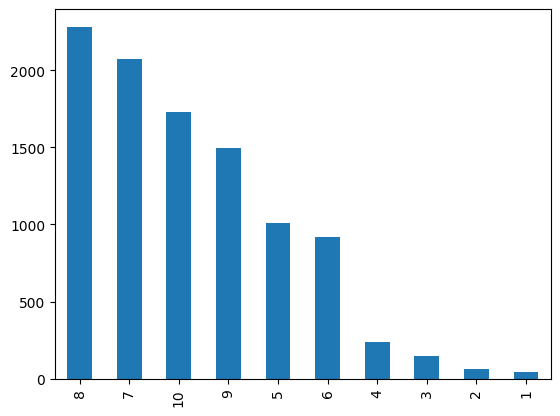

In [24]:
books_df['Book.Rating'].value_counts().plot(kind='bar');

In [25]:
books_df.groupby(['Book.Title'])['Book.Rating'].count()

Book.Title
 Jason, Madison &amp                                                       1
 Other Stories;Merril;1985;McClelland &amp                                 1
 Repairing PC Drives &amp                                                  1
'48                                                                        1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      1
                                                                          ..
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    1
\Well, there's your problem\: Cartoons                                     1
iI Paradiso Degli Orchi                                                    1
stardust                                                                   1
Ã?Â?bermorgen.                                                             1
Name: Book.Rating, Length: 9659, dtype: int64

In [26]:
books_df.groupby(['Book.Title'])['Book.Rating'].mean()

Book.Title
 Jason, Madison &amp                                                       8.0
 Other Stories;Merril;1985;McClelland &amp                                 6.0
 Repairing PC Drives &amp                                                  4.0
'48                                                                        7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      8.0
                                                                          ... 
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    8.0
\Well, there's your problem\: Cartoons                                     9.0
iI Paradiso Degli Orchi                                                    7.0
stardust                                                                   5.0
Ã?Â?bermorgen.                                                             4.0
Name: Book.Rating, Length: 9659, dtype: float64

In [27]:
# User-Item Ineraction matrix
user_books_df = books_df.pivot_table(index='User.ID',
                                 columns='Book.Title',
                                 values='Book.Rating')

user_books_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [28]:
user_books_df.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  7., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [29]:
#Impute those NaNs with 0 values
user_books_df.fillna(0,inplace=True)

In [30]:
user_books_df.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 7., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
user_books_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [32]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine , correlation

In [33]:
#Now we will calculate Cosine Similarity between Users

In [34]:
user_similarity =1- pairwise_distances(user_books_df.values , metric= 'cosine')
user_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [35]:
#storing the result into the dataframe
user_similarity_df=pd.DataFrame(user_similarity)
user_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
user_similarity_df.shape

(2182, 2182)

In [37]:
# user_books_df is my User-Item Ineraction matrix
user_books_df.index

Int64Index([     8,      9,     10,     12,     14,     16,     17,     19,
                22,     26,
            ...
            278831, 278832, 278836, 278843, 278844, 278846, 278849, 278851,
            278852, 278854],
           dtype='int64', name='User.ID', length=2182)

In [38]:
#Set the index and column names of user-similarity matrix to user-ids
user_similarity_df.index = user_books_df.index
user_similarity_df.columns = user_books_df.index
user_similarity_df

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
# It is obvious that a particular user is 100% similar to itself

In [40]:
# Filling up diagonal entries from 1 to 0 because we don't need to recommend those books which have already read by user
np.fill_diagonal(user_similarity, 0)
user_similarity_df

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
user_similarity_df.sort_values([278843],ascending=False).head(100)

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
277959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.080630,0.0,0.0,0.0,0.0,0.0,0.0
277585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.077712,0.0,0.0,0.0,0.0,0.0,0.0
1116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.053033,0.0,0.0,0.0,0.0,0.0,0.0
3757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008755,0.0,0.0,0.0,0.0,0.0,0.0
161753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
161448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
161443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
user_similarity_df[278843]

User.ID
8         0.0
9         0.0
10        0.0
12        0.0
14        0.0
         ... 
278846    0.0
278849    0.0
278851    0.0
278852    0.0
278854    0.0
Name: 278843, Length: 2182, dtype: float64

In [43]:
user_similarity_df[user_similarity_df[278843]>0.08]

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
277959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.08063,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
books_df[(books_df['User.ID']==278843) | (books_df['User.ID']==277959)]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
1352,1353,277959,Good Omens,8
1353,1354,277959,Il Dio Delle Piccole Cose,6
1354,1355,277959,The Songcatcher: A Ballad Novel,7
1355,1356,277959,Message in a Bottle,8
1356,1357,277959,Fatal Voyage,10
1357,1358,277959,Praying for Sleep,6
1358,1359,277959,Flashback,7
2353,2354,278843,The Mighty,9
2354,2355,278843,Adventures of Huckleberry Finn,7
2355,2356,278843,Murder on the Orient Express (Hercule Poirot M...,8


### **Recommendation Process**

In [50]:

def get_reco(customer_id):

      try:

                L=list(user_similarity_df.sort_values([customer_id],ascending=False).head(150).index)

                books_list=list(books_df[books_df["User.ID"].isin(L)]['Book.Title'])

                recommended_books =set(books_list)-set(books_df[books_df["User.ID"]==customer_id]["Book.Title"])

                if recommended_books==set():

                    return "Please look for more similar customer"

                return recommended_books


      except:

                return "The User_id isn't available"


In [53]:
get_reco(278843) #Recommendation of books for user-id=278843

{"Death of a Fool (St. Martin's Dead Letter Mysteries.)",
 'LAUGH BOOK, THE',
 "Moving on: The Gay Man's Guide for Coping When a Relationship Ends",
 'On Edge',
 'Dare Truth or Promise',
 'Uncle Boris in the Yukon and Other Shaggy Dog Stories',
 'The River Midnight',
 'Virginia Woolf: The Impact of Childhood Sexual Abuse on Her Life and Work',
 'Mrs Keppel and Her Daughter',
 'The Last Report on the Miracles at Little No Horse: A Novel',
 'The Dirty Girls Social Club: A Novel',
 'Terms of Adornment : The Ultimate Guide to Accessories',
 'The Great and Secret Show',
 'Fat Land: How Americans Became the Fattest People in the World',
 'Modern Manners: An Etiquette Book for Rude People',
 'Uppity Women of Ancient Times',
 "Ain't I A Woman!: A Book of Women's Poetry from Around the World",
 'Zits Unzipped : Sketchbook #5 (Scott, Jerry, Zits Collection Sketchbook, No. 5.)',
 'Echo',
 "Parents Are Teachers Too: Enriching Your Child's First Six Years (Little Hands(r))",
 'My Little Sister Ate 

In [54]:
get_reco(12)  #Recommendation of books for user-id=12

{"'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities",
 '20,001 Names for Baby',
 '24 Hours',
 '500 palabras nuevas para ti / 500 Words To Grow On',
 'A Cat in the Manger: An Alice Nestleton Mystery (Alice Nestleton Mysteries (Paperback))',
 'A Certain Justice: A Novel',
 "A Child's Night Dream",
 'A Darkness More Than Night',
 'A Dog Year: Twelve Months, Four Dogs, and Me',
 "A False Sense of Well Being (Ballantine Reader's Circle)",
 'A Flash in the Pan: 100 Fast and Furious Recipes for Wok and Stir-Fry',
 'A Free Man of Color (Benjamin January (Paperback))',
 'A GATHERING OF SAINTS',
 'A Is for Salad',
 'A Kiss Remembered',
 'A Lady Never Trifles with Thieves',
 'A Letter of Mary (Mary Russell Novels (Paperback))',
 'A Letter to Harvey Milk: Short Stories',
 'A Light in the Attic',
 'A Mighty Heart',
 'A Pocket Guide to Oahu',
 'A SPY IN THE HOUSE OF LOVE',
 "A Single Tear: A Family's Persecution, Love, and Endurance in Communist China",
 'A Soldier of the Great W

Rough codes

In [ ]:
books_df.groupby(["Book.Title"])["User.ID"]

In [ ]:
# Example -> User with 'User.ID'=162121

In [ ]:
#books already read by 'User.ID'=162121
ar_df=books_df[books_df['User.ID']==162121]
ar_df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9990,9991,162121,The Cloister Walk,7
9991,9992,162121,Open Water,5
9992,9993,162121,The Evolution of Jane,8
9993,9994,162121,AT PARADISE GATE,8
9994,9995,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [ ]:
# list of books that are already read by 'User.ID'=162121
ar=ar_df.iloc[:,2].tolist()
ar

['The Cloister Walk',
 'Open Water',
 'The Evolution of Jane',
 'AT PARADISE GATE',
 'I Should Have Stayed Home: The Worst Trips of the Great Writers (Travel Literature Series)',
 'American Fried: Adventures of a Happy Eater.',
 'Cannibal In Manhattan',
 'How to Flirt: A Practical Guide',
 'Twilight']

In [ ]:
# List of top 5 similar users  with 'User.ID'=162121
L=list(user_similarity_df.sort_values([162121],ascending=False).head(5).index)
L

[8, 161755, 161744, 161749, 161750]

In [ ]:
# List of books that are read by top 5 similar users
books_list=list(books_df[books_df['User.ID'].isin(L)]['Book.Title'])
books_list

['Ancient Celtic Romances',
 'The Western way: A practical guide to the Western mystery tradition',
 'Wings',
 'Truckers',
 'Keepers of the Earth Teachers Guide',
 'The Celts Activity Book',
 'The Art Of Celtia',
 'Mr. Bridge',
 "I'm the One That I Want",
 'FOR COLORED GIRLS WHO HAVE CONSIDERED SUICIDE WHEN THE RAINBOW IS ENUF',
 'After All These Years',
 'Jennifer, Hecate, MacBeth, William McKinley and Me, Elizabeth',
 'Black Boy (American Hunger : a Record of Childhood and Youth)',
 'The Bitch in the House : 26 Women Tell the Truth About Sex, Solitude, Work, Motherhood, and Marriage',
 "The Essential 55: An Award-Winning Educator's Rules for Discovering the Successful Student in Every Child",
 'To Afghanistan and Back',
 "The Shelters of Stone (Earth's Children, Book 5)",
 'The Tick: Mighty Blue Justice!',
 "Pooh's Workout Book",
 'The Corner : A Year in the Life of an Inner-City Neighborhood',
 'Random Family: Love, Drugs, Trouble, and Coming of Age in the Bronx',
 'Send in the Stun

In [ ]:
# To verify that there in no common book in the books_list
# because we are not supposed to recommend those books again to users
# ar is list of books read by 'User.ID'=162121
# books_list is list of books that are read by top 5 similar users to 'User.ID'=162121
a_set = set(ar)
b_set = set(books_list)
if (a_set & b_set):
  print(a_set & b_set)
else:
  print("No common boook")

No common boook


In [ ]:
# Recommending books list
recommending_books=Counter(books_list).most_common()
recommending_books

[('Ancient Celtic Romances', 1),
 ('The Western way: A practical guide to the Western mystery tradition', 1),
 ('Wings', 1),
 ('Truckers', 1),
 ('Keepers of the Earth Teachers Guide', 1),
 ('The Celts Activity Book', 1),
 ('The Art Of Celtia', 1),
 ('Mr. Bridge', 1),
 ("I'm the One That I Want", 1),
 ('FOR COLORED GIRLS WHO HAVE CONSIDERED SUICIDE WHEN THE RAINBOW IS ENUF', 1),
 ('After All These Years', 1),
 ('Jennifer, Hecate, MacBeth, William McKinley and Me, Elizabeth', 1),
 ('Black Boy (American Hunger : a Record of Childhood and Youth)', 1),
 ('The Bitch in the House : 26 Women Tell the Truth About Sex, Solitude, Work, Motherhood, and Marriage',
  1),
 ("The Essential 55: An Award-Winning Educator's Rules for Discovering the Successful Student in Every Child",
  1),
 ('To Afghanistan and Back', 1),
 ("The Shelters of Stone (Earth's Children, Book 5)", 1),
 ('The Tick: Mighty Blue Justice!', 1),
 ("Pooh's Workout Book", 1),
 ('The Corner : A Year in the Life of an Inner-City Neigh